In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salmamagdyali","key":"48a3f13c4023ee9fa1bcf1edf8c49407"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                 title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023               Data Science Salaries 2023 💸                 25KB  2023-04-13 09:55:16           8358        222  1.0              
salvatorerastelli/spotify-and-youtube               Spotify and Youtube                           9MB  2023-03-20 15:43:25          12784        423  1.0              
iammustafatz/diabetes-prediction-dataset            Diabetes prediction dataset                 734KB  2023-04-08 06:11:45           4391         65  1.0              
shawkyelgendy/furniture-price-prediction            Furniture Price Prediction                   81KB  2023-04-17 09:35:17           1227         29  1.0       

In [8]:
! kaggle competitions download -c sartajbhuvaji/brain-tumor-classification-mri

403 - Forbidden


In [9]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 86% 75.0M/86.8M [00:00<00:00, 183MB/s]
100% 86.8M/86.8M [00:00<00:00, 183MB/s]


In [10]:
!unzip '/content/brain-tumor-classification-mri.zip'

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [13]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
print(y_train.shape, y_test.shape)

(2937,) (327,)


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 batch_normalization (BatchN  (None, 146, 146, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        3

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,batch_size = 32,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 763s 9s/step - loss: 1.3202 - accuracy: 0.4079 - val_loss: 1.2006 - val_accuracy: 0.5000
Epoch 2/30
83/83 [==============================] - 803s 10s/step - loss: 0.9808 - accuracy: 0.5706 - val_loss: 1.0686 - val_accuracy: 0.5578
Epoch 3/30
83/83 [==============================] - 770s 9s/step - loss: 0.8510 - accuracy: 0.6402 - val_loss: 0.8585 - val_accuracy: 0.6531
Epoch 4/30
83/83 [==============================] - 759s 9s/step - loss: 0.6797 - accuracy: 0.7196 - val_loss: 0.6778 - val_accuracy: 0.7653
Epoch 5/30
83/83 [==============================] - 752s 9s/step - loss: 0.5732 - accuracy: 0.7692 - val_loss: 0.8056 - val_accuracy: 0.6531
Epoch 6/30
83/83 [==============================] - 749s 9s/step - loss: 0.5285 - accuracy: 0.7885 - val_loss: 0.5154 - val_accuracy: 0.8265
Epoch 7/30
83/83 [==============================] - 757s 9s/step - loss: 0.4199 - accuracy: 0.8373 - val_loss: 0.5852 - val_accuracy: 0.7891
Epoch 8/30
8

In [ ]:
print(X_train.shape, X_test.shape)

(2937, 150, 150, 3) (327, 150, 150, 3)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

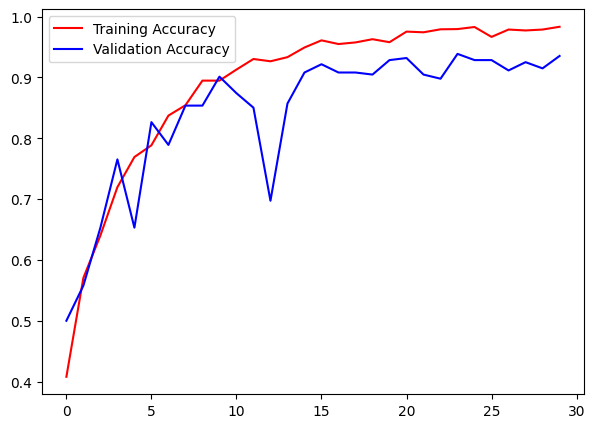

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(7,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

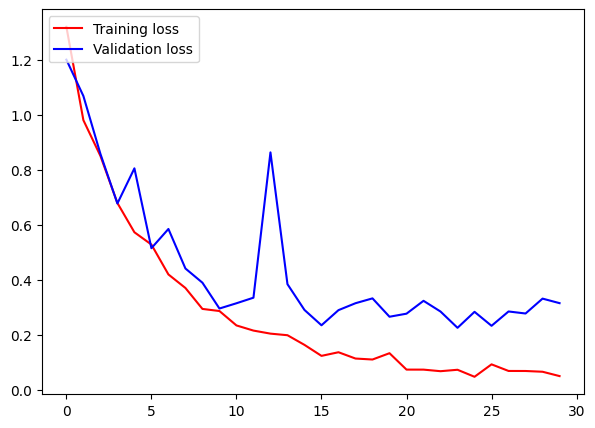

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(7,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('/content/Training/pituitary_tumor/p (103).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

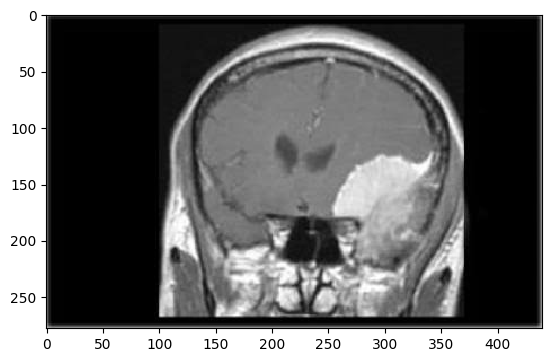

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Testing/meningioma_tumor/image(1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
Y_pred=model.predict(img_array)
indices = Y_pred.argmax()
indices

1/1 [==============================] - 1s 544ms/step


3

In [ ]:
predictions = model.predict(X_test, steps=len(X_test), verbose=0)

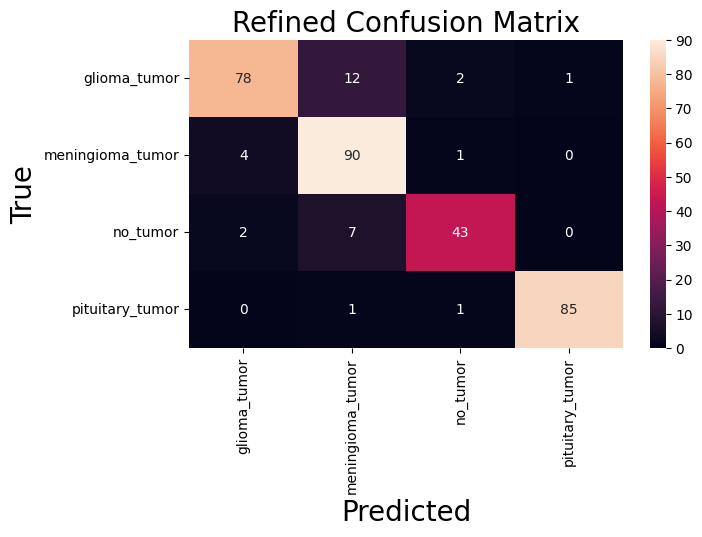

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix


y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

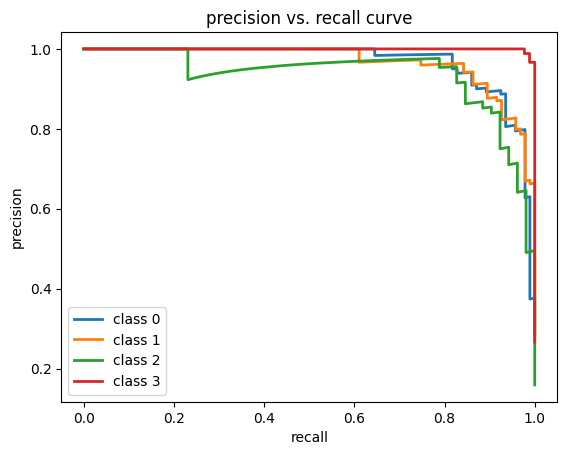

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve
# precision recall curve
precision = dict()
recall = dict()
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        predictions[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
import numpy
from sklearn import metrics
print(metrics.classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.84      0.88        93
           1       0.82      0.95      0.88        95
           2       0.91      0.83      0.87        52
           3       0.99      0.98      0.98        87

    accuracy                           0.91       327
   macro avg       0.91      0.90      0.90       327
weighted avg       0.91      0.91      0.91       327

